In [1]:
# Useful Libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
# Reading data
county_yield = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/USA_county_yield_gsw.csv'
data = pd.read_csv(county_yield)
w7 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2007.csv'
wind07 = pd.read_csv(w7, skiprows = 1)
w8 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2008.csv'
wind08 = pd.read_csv(w8, skiprows = 1)
w9 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2009.csv'
wind09 = pd.read_csv(w9, skiprows = 1)
w10 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2010.csv'
wind10 = pd.read_csv(w10, skiprows = 1)
w11 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2011.csv'
wind11 = pd.read_csv(w11, skiprows = 1)
w12 = 'https://raw.githubusercontent.com/davidwma22/EPS-168/master/wind_2012.csv'
wind12 = pd.read_csv(w12, skiprows = 1)

In [3]:
! GET /api/wind-toolkit/v2/wind/wtk-download.csv?api_key={{037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC}}&wkt=POINT\(-78.483215 32.104233\)&attributes=&names=2009&utc=true&email=julians3.1415@gmail.com

In [4]:
! GET /api/wind-toolkit/v2/wind/wtk-download.csv?api_key={{037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC}}&wkt=POINT\(\(46 -104, 46 -88, 30 -88, 30 -104\)\)&attributes=&names=2009&utc=true&email=julians3.1415@gmail.com

In [5]:
wkt = POLYGON((46 -104, 46 -88, 30 -88, 30 -104))
wkt = POLYGON((46 -104, 46 -102, 44 -102, 44 -104))

In [27]:
response = requests.get("https://developer.nrel.gov/api/wind-toolkit/v2/wind/wtk-download.csv?api_key={{037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC}}&037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCCwkt=POLYGON%28%28-94.60052490234375+39.74732195489861%2C-94.21600341796875+39.74732195489861%2C-94.21600341796875+39.457402514270825%2C-94.60052490234375+39.457402514270825%2C-94.60052490234375+39.74732195489861%29%29&attributes=&names=2009&utc=true&email=julians3.1415@gmail.com")

In [28]:
print(response.status_code)

403


In [24]:
response = requests.get("https://developer.nrel.gov/api/wind-toolkit/v2/wind/wtk-download.csv?api_key={{yMDVMKtCa4FGh2vmvstXY8ZDZbWKqBl2vddmnKZg}}&wkt=POINT(32.104233 -78.483215)&names=2009&utc=true&leap_day=true&email=davidwma@yahoo.com")
print(response.status_code)

403


In [10]:
# Let's start with Marion County, Kansas
marion = data.loc[(data['State'] == 'KANSAS') & (data['County'] == 'MARION')]

In [11]:
marion.head(5)

,GEOID,Year,Year_2,State,State_ANSI,County,County_ANSI,lat,lon,Commodity,...,ln_yield,tmean,gdd_10_28,kdd_28,ppt,swdown,smrz,smrz_2,ppt_2,swdown_2
4980,20115,2000,4000000.0,KANSAS,20.0,MARION,115.0,38.359647,-97.102771,CORN,...,4.465908,19.706800,9.709944,0.962113,2.209874,5.871472,NaN,NaN,33.723801,38.177426
4981,20115,2001,4004001.0,KANSAS,20.0,MARION,115.0,38.359647,-97.102771,CORN,...,4.234107,19.501589,9.857521,0.890085,2.711690,5.979047,NaN,NaN,59.479359,39.551400
4982,20115,2002,4008004.0,KANSAS,20.0,MARION,115.0,38.359647,-97.102771,CORN,...,4.060443,18.680007,9.481026,0.749693,2.815333,5.839116,NaN,NaN,58.698514,37.686423
4983,20115,2003,4012009.0,KANSAS,20.0,MARION,115.0,38.359647,-97.102771,CORN,...,4.234107,19.003495,9.420483,0.861348,3.349504,5.800624,NaN,NaN,94.260118,37.495716
4984,20115,2004,4016016.0,KANSAS,20.0,MARION,115.0,38.359647,-97.102771,CORN,...,4.859812,18.395759,8.905033,0.367217,3.840765,5.805263,NaN,NaN,115.605059,37.433886


[[1.24195489]]


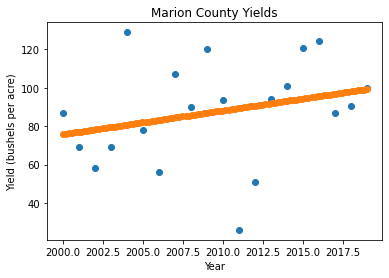

In [12]:
x = marion['Year'].values.reshape(-1,1)
y = marion['yield'].values.reshape(-1,1)

lr = LinearRegression().fit(x,y)

x_range = np.linspace(min(x), max(x), num=100)
y_pred = lr.predict(x_range)
plt.scatter(x,y)
plt.scatter(x_range, y_pred)
plt.title('Marion County Yields')
plt.xlabel('Year')
plt.ylabel('Yield (bushels per acre)')
print(lr.coef_)


In [13]:
w_all = pd.concat([wind07,wind08, wind09, wind10, wind11, wind12], axis=0)


In [14]:
w_all

,Year,Month,Day,Hour,Minute,power - DEPRECATED,wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 100m (C),air pressure at 100m (Pa),density - DEPRECATED
0,2007,1,1,0,0,NaN,325.93,10.59,-2.68,95980,NaN
1,2007,1,1,0,5,NaN,326.17,10.59,-2.71,95980,NaN
2,2007,1,1,0,10,NaN,325.56,10.43,-2.75,95990,NaN
3,2007,1,1,0,15,NaN,325.53,10.24,-2.79,96000,NaN
4,2007,1,1,0,20,NaN,325.73,10.14,-2.83,96010,NaN
...,...,...,...,...,...,...,...,...,...,...,...
105115,2012,12,31,23,35,NaN,308.96,15.57,5.69,95830,NaN
105116,2012,12,31,23,40,NaN,311.97,15.86,5.59,95840,NaN
105117,2012,12,31,23,45,NaN,314.89,16.34,5.54,95860,NaN
105118,2012,12,31,23,50,NaN,316.88,16.94,5.55,95880,NaN


In [15]:
speed = [x[0]*2.237 for x in w_all['wind speed at 100m (m/s)'].values.reshape(-1,1) if x> 50/2.237]
years = []
x_range = np.linspace(0, len(speed), len(speed))

(array([32., 18.,  4.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([50.01932 , 54.164481, 58.309642, 62.454803, 66.599964, 70.745125,
        74.890286, 79.035447, 83.180608, 87.325769, 91.47093 ]),
 <a list of 10 Patch objects>)

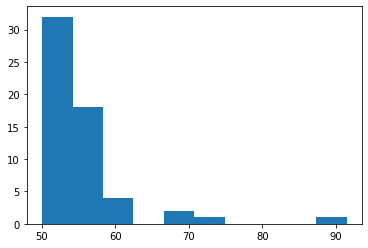

In [16]:
plt.hist(speed)

In [17]:
speed[1:10]

[50.06406,
 51.09308,
 55.96974,
 53.73274,
 54.67228000000001,
 57.22246,
 57.0435,
 56.30529000000001,
 52.793200000000006]

In [18]:
def rand_jitter(arr):
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

ValueError: x and y must be the same size

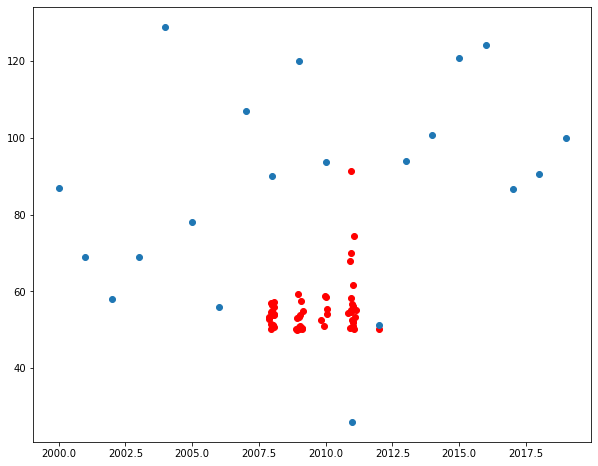

In [19]:
plt.figure(figsize=(10,8))
data = [x for x in w_all[['wind speed at 100m (m/s)', 'Year']].values if x[0]>50/2.237]
speed = [x[0]*2.237 for x in data]
years = rand_jitter([x[1] for x in data])
plt.scatter(years, speed, color = 'r')
plt.scatter(x,y)
plt.scatter(x_range, y_pred)
plt.title('Marion County Yields')
plt.xlabel('Year')
plt.ylabel('Yield (bushels per acre)')


In [ ]:
plt.scatter(years, speed, color = 'r')
plt.title('High Wind Events Marion County \'07-\'12')
plt.xlabel('Year')
plt.ylabel('Wind Speed (mph)')

In [ ]:
w_all.dtypes

In [ ]:
x = marion['Year'].values.reshape(-1,1)
y = marion['yield'].values.reshape(-1,1)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8)


xtrain_poly = PolynomialFeatures(5).fit_transform(xtrain)
xtest_poly = PolynomialFeatures(5).fit_transform(xtest)

lr = LinearRegression(fit_intercept=False) # intercept already defined in fit_transform

lr.fit(xtrain_poly, ytrain)

ytest_pred = lr.predict(xtest_poly)

mse = mean_squared_error(ytest_pred, ytest)
r2 = r2_score(ytest, ytest_pred)
print('The r2 score of the degree 5 wind-only model is {}'.format(r2))
print('The MSE of the degree 5 wind only model is {}'.format(mse))

# So year doesn't predict yield very well :) 

In [ ]:
y = marion.loc[(marion['Year']< 2013) & (marion['Year']>2007)]['yield'].values
print(y)

In [ ]:
x = w_all.loc[(w_all['wind speed at 100m (m/s)']>50/2.237)].groupby('Year').count()['wind speed at 100m (m/s)'].values

In [ ]:
x

In [ ]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8)


xtrain_poly = PolynomialFeatures(5).fit_transform(xtrain)
xtest_poly = PolynomialFeatures(5).fit_transform(xtest)

lr = LinearRegression(fit_intercept=False) # intercept already defined in fit_transform

lr.fit(xtrain_poly, ytrain)

ytest_pred = lr.predict(xtest_poly)

mse = mean_squared_error(ytest_pred, ytest)
r2 = r2_score(ytest, ytest_pred)
print('The r2 score of the degree 5 wind-only model is {}'.format(r2))
print('The MSE of the degree 5 wind only model is {}'.format(mse))

In [32]:
url = 'http://developer.nrel.gov/api/pvwatts/v6.csv?parameters'
parameters = { 'format' : 'csv', 'api_key' : '[037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC]', 'system_capacity' : 50.0, 'module_type' : 0, 
            'losses' : 14.0, 'array_type' : 0, 'tilt' : 20, 'azimuth' : 180, 'lat' : 47.648737, 
            'lon' : -122.319889, 'timeframe' : 'hourly'} 
response = requests.get(url, params=parameters) 
print(response) # POLYGON((46 -104, 46 -102, 44 -102, 44 -104))    

<Response [400]>


In [ ]:
/api/wind-toolkit/v2/wind/wtk-download.     "POLYGON((46 -104, 46 -103, 45 -103, 45 -103))"

In [3]:
url = 'https://developer.nrel.gov/api/wind-toolkit/v2/wind/wtk-download.csv?'
parameters = { 'api_key' : 'yMDVMKtCa4FGh2vmvstXY8ZDZbWKqBl2vddmnKZg', 
              'wkt' : "POINT(-78.483215 32.104233)",
             'attributes' : ['windspeed_10m'], 'names' : [2007], 'email' : 'davidwma@yahoo.com'} 
response = requests.get(url, params=parameters) 
print(response.content)


b'{"inputs":{"wkt":"POINT(-78.483215 32.104233)","attributes":["windspeed_10m","windspeed_100m"],"names":"2007","email":"davidwma@yahoo.com"},"metadata":{"version":"2.0.0"},"status":400,"errors":["input.split is not a function"]}'


In [51]:
#df = pd.read_csv(response.content, delimiter=',')
from io import StringIO
StringData = StringIO(response.text)
df = pd.read_csv(StringData, sep = ",", header=1)
print(df)

      Year  Month  Day  Hour  Minute  wind speed at 10m (m/s)
0     2007      1    1     0      30                    10.84
1     2007      1    1     1      30                    10.38
2     2007      1    1     2      30                    11.51
3     2007      1    1     3      30                    10.80
4     2007      1    1     4      30                    11.12
...    ...    ...  ...   ...     ...                      ...
8755  2007     12   31    19      30                     5.28
8756  2007     12   31    20      30                     4.41
8757  2007     12   31    21      30                     3.89
8758  2007     12   31    22      30                     3.56
8759  2007     12   31    23      30                     3.72

[8760 rows x 6 columns]


In [52]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'wind speed at 10m (m/s)'], dtype='object')

In [18]:
url = 'https://developer.nrel.gov/api/pvwatts/v6.csv?parameters'
parameters = { 'api_key' : '[037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC]', 'lat' : -78.483215, 'lon' : 32.104233,
             'attributes' : ['windspeed_10m'], 'names' : [2007],
            'email' : 'julians3.1415@gmail.com'} 
response = requests.get(url, params=parameters) 
print(response)

<Response [403]>


In [12]:
! GET /api/wind-toolkit/v2/wind/wtk-download.csv?api_key={{037P8C9W1gMsO4cNFDFvUYvTDnIhMlA3NSVhXdCC}}&wkt=POINT\(-78.483215 32.104233\)&names=2009&utc=true&leap_day=true&email=julians3.1415@gmail.com&reason=example&affiliation=NREL

/bin/bash: 32.104233): command not found
/bin/bash: GET: command not found


In [ ]:
https://developer.nrel.gov/api/wind-toolkit/wind/wtk_download.csv?
    wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&
    full_name={name}&email={email}&affiliation={affiliation}&
    mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}
    
api_key={{yMDVMKtCa4FGh2vmvstXY8ZDZbWKqBl2vddmnKZg}}&wkt=POINT(32.104233 -78.483215)&names=2009&utc=true&leap_day=true&email=davidwma@yahoo.com")